# Linear Regression:

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import RANSACRegressor

## 1. Generate 2000 data points with one-dimensional feature randomly sampled.
For each data point, attribute a real number representing its target value.

In [3]:
n_samples = 2000
X = np.random.rand(n_samples, 1)
y = 3 * X.squeeze() + np.random.randn(n_samples) * 2


## 2. Fit a line using the data points and their target values using two different methods

In [5]:
# Method 1: Using sklearn Linear Regression
model1 = LinearRegression()
model1.fit(X, y)

# Method 2: Using Gradient Descent
def gradient_descent(X, y, learning_rate=0.01, epochs=100):
    m, b = 0, 0  # initialization of coefficients
    for _ in range(epochs):
        y_pred = m * X + b
        m -= learning_rate * ((y_pred - y) * X).mean()
        b -= learning_rate * (y_pred - y).mean()
    return m, b

m, b = gradient_descent(X.flatten(), y)


## 3. Add 20 outlier data points randomly distributed, set them and their target values far away from the original data point

In [6]:
n_outliers = 20
X_outliers = np.random.uniform(low=-1, high=2, size=(n_outliers, 1))
y_outliers = np.random.uniform(low=-10, high=20, size=n_outliers)
X = np.concatenate([X, X_outliers])
y = np.concatenate([y, y_outliers])


## 4. Fit a line using all data points using one of the proposed two methods. What do you observe?

In [7]:
# Fit a line using all data points with Method 2 (Gradient Descent)
model2 = LinearRegression()
model2.fit(X, y)


LinearRegression()

## 5. Add regularization to the proposed method, use the sum of the square of coefficients. What do you observe?

In [8]:
# Add regularization (ridge) to Method 2
model3 = Ridge(alpha=1.0)
model3.fit(X, y)


Ridge()

## 6. Fit linear model with RANSAC algorithm

In [9]:
# Fit linear model with RANSAC
ransac = RANSACRegressor()
ransac.fit(X, y)


RANSACRegressor()

# Linear Classification

## 1. Create an instance of Logistic Regression Classifier and fit the data.

In [11]:
# Import necessary libraries
from sklearn import datasets
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# Create an instance of Logistic Regression Classifier
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

## 2. Plot the decision boundary

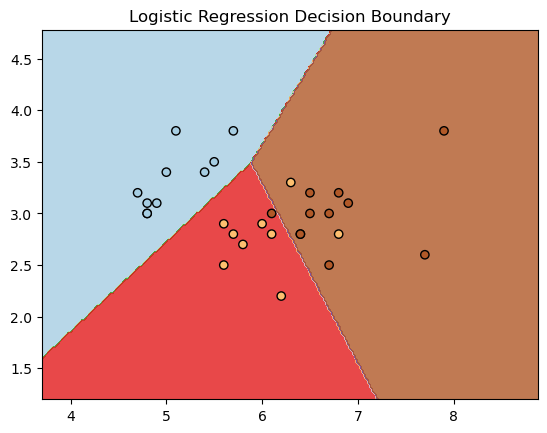

In [12]:
# Plot the decision boundary
def plot_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

# Separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Logistic Regression model
log_reg.fit(X_train, y_train)

# Plot the decision boundary
plot_decision_boundary(X_test, y_test, log_reg, "Logistic Regression Decision Boundary")
